# 機械学習テスト
[ 機械学習:iris データセットを用いて scikit-learn の様々な分類アルゴリズムを試してみた](https://qiita.com/ao_log/items/fe9bd42fd249c2a7ee7a)

あくまで手法テストなので、バリデーションはない

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# データセット

In [2]:
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  



| Attribute | 説明 |
|-----------|------------|
| sepal length | ガクの長さ |
| sepal width |	ガクの幅 |
| petal length	| 花弁の長さ | 
| petal width | 花弁の幅 | 

In [3]:
print("shape : ",iris.data.shape)
print("target name ; ",iris.target_names)

shape :  (150, 4)
target name ;  ['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df["target_name"]= [iris.target_names[i] for i in iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# 基礎統計量

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 欠損確認

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


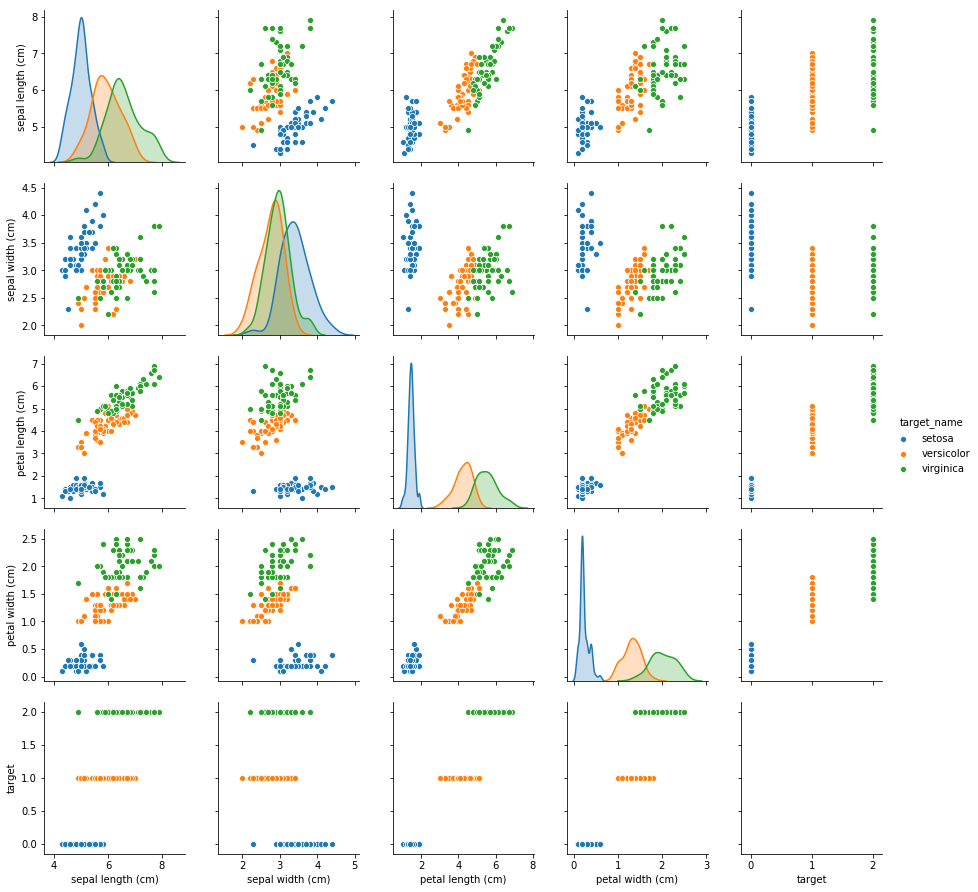

In [7]:
sns.pairplot(df, hue="target_name")

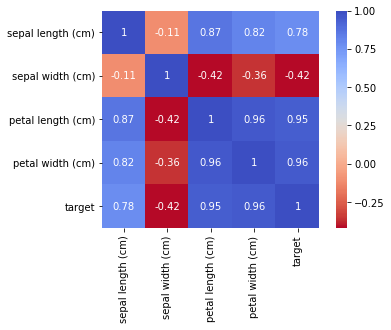

In [8]:
corr = df[df.columns[:-1]].corr()
# _rをつけると逆になる
cmap = sns.color_palette("coolwarm_r", 200)
sns.heatmap(corr, square=True, annot=True,cmap=cmap)

In [9]:
# import some data to play with
X = iris.data[:, [0, 2]] 
y = iris.target

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

target_name_list = iris.target_names
target_name_list

def decision_boundary(clf, X, y, ax, title,label_name=target_name_list,markers=["o", "s", "+","^"],colors = ["red","blue","lightgreen","gray","yellow","pink","cyan"]):
    # graph common settings
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    clf.fit(X, y)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    label_list =  np.sort(np.unique(Z))
    colors_map= colors[:len(label_list)]
    cmap = ListedColormap(colors_map)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap,alpha=0.3)

        
    for idx,cl in enumerate( np.sort(np.unique(y))):
        X_tmp = X[y==cl]
        
        # Plot also the training points
        ax.scatter(X_tmp[:, 0], X_tmp[:, 1],alpha=0.8, c=colors[idx],label=label_name[idx],marker=markers[idx],edgecolors="black"
                  )

    # label
    ax.set_title(title)
    ax.set_xlabel('sepal length')
    ax.set_ylabel('petal length')

# 教師あり学習

# k-近傍(k-NN)
k近傍法（ケイきんぼうほう、英: k-nearest neighbor algorithm, k-NN）は、特徴空間における最も近い訓練例に基づいた分類の手法であり、パターン認識でよく使われる。最近傍探索問題の一つ。k近傍法は、インスタンスに基づく学習の一種であり、怠惰学習（英語: lazy learning） の一種である。その関数は局所的な近似に過ぎず、全ての計算は分類時まで後回しにされる。また、回帰分析にも使われる。  
  
 k近傍法は、ほぼあらゆる機械学習アルゴリズムの中で最も単純である。あるオブジェクトの分類は、その近傍のオブジェクト群の投票によって決定される（すなわち、k 個の最近傍のオブジェクト群で最も一般的なクラスをそのオブジェクトに割り当てる）。k は正の整数で、一般に小さい。k = 1 なら、最近傍のオブジェクトと同じクラスに分類されるだけである。二項分類の場合、k を奇数にすると同票数で分類できなくなる問題を避けることができる。

KNeighborsClassifierを使用します。n_neighbors で予測に使用する近傍点の数を設定します。n_neighbors = 1 の場合は決定境界が鋭角になる部分もあります。数が多くなるに従いなだらかになっていき、10 になると境界が単純になりすぎて予測性能が落ちる場合があります。

In [16]:
KNeighborsClassifier.__init__

<function sklearn.neighbors.classification.KNeighborsClassifier.__init__(self, n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)>

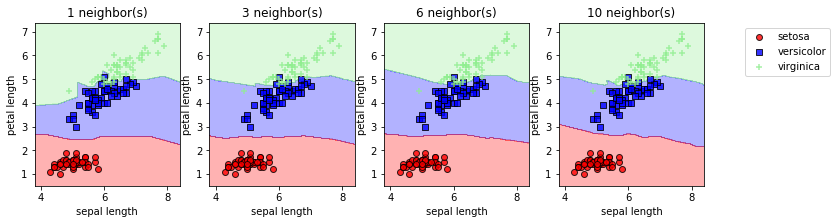

In [17]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for ax, n_neighbors in zip(axes, [1, 3, 6, 10]):
    title = "%s neighbor(s)"% (n_neighbors)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    decision_boundary(clf, X, y, ax, title)
plt.legend(bbox_to_anchor=(1.9, 1), loc='upper right')

# ロジスティック回帰
ロジスティック回帰分析は   
目的変数が質的変数、説明変数が量的変数   
の多変量解析を行う際に非常に有用です。  

y=1/(1+exp(-(b1*x1+b2*x2+b3*x3+・・・+bi*xi+b0)))  
y:目的変数(確率)  
x1, x2, x3,・・・, xi:説明変数  
b1, b2, b3,・・・, bi:偏回帰係数  
b0:定数  

LogisticRegressionを使用します。決定境界は直線になります。C は正則化の度合いを調整するパラメータです。正則化は学習時にペナルティを与えることで過学習を抑える効果があります。C を大きくすると正則化が弱くなり過学習気味になりますが、小さすぎるとデータの特徴を大雑把にしか獲得できません。

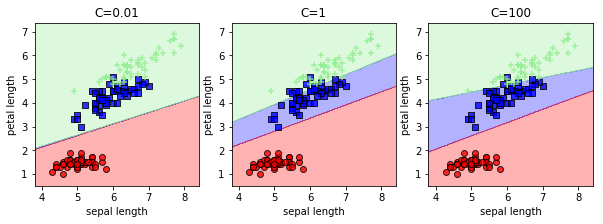

In [18]:
from sklearn.linear_model import LogisticRegression

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, C in zip(axes, [0.01, 1, 100]):
    title = "C=%s"% (C)
    clf = LogisticRegression(C=C,random_state=1)
    decision_boundary(clf, X, y, ax, title)

# 線形サポートベクタマシン 
C はロジスティック回帰同様、正則化の度合いを調整するパラメータです。  

サポートベクターマシンは、線形入力素子を利用して 2 クラスのパターン識別器を構成する手法である。訓練サンプルから、各データ点との距離が最大となるマージン最大化超平面を求めるという基準（超平面分離定理）で線形入力素子のパラメータを学習する。
  
最も簡単な場合である、与えられたデータを線形に分離することが可能な（例えば、3次元のデータを2次元平面で完全に区切ることができる）場合を考えよう。
  
このとき、SVMは与えられた学習用サンプルを、もっとも大胆に区切る境目を学習する。 学習の結果得られた超平面は、境界に最も近いサンプルとの距離（マージン）が最大となるパーセプトロン（マージン識別器）で定義される。
  
学習過程はラグランジュの未定乗数法とKKT条件を用いることにより、最適化問題の一種である凸二次計画問題で定式化される。 ただし、学習サンプル数が増えると急速に計算量が増大するため、分割統治法の考え方を用いた手法なども提案されている。

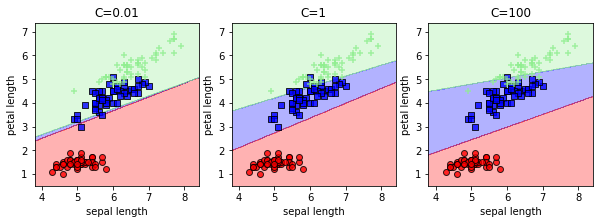

In [19]:
from sklearn.svm import LinearSVC

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, C in zip(axes, [0.01, 1, 100]):
    title = "C=%s"% (C)
    clf = LinearSVC(C=C,random_state=1)
    decision_boundary(clf, X, y, ax, title)

# カーネル法を用いたサポートベクタマシン
SVM とも呼ばれます。線形カーネルベクタマシンと比べて、非線形な分離が可能です。  
  
SVCを使用します。C は正則化のパラメータです  
gamma は訓練データの影響が及ぶ範囲で、小さいと遠くまで、大きいと近くになります。よって、gamma が大きすぎると過学習になり、小さすぎると大雑把にしかデータの特徴を獲得できません。

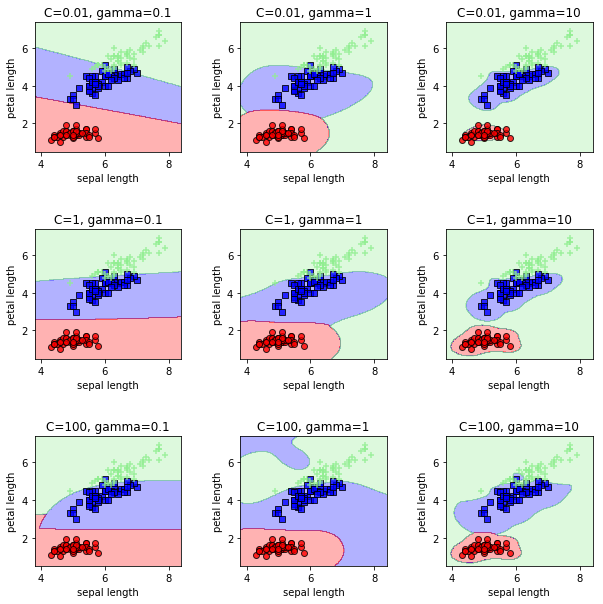

In [20]:
from sklearn.svm import SVC

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

plt.subplots_adjust(wspace=0.4,hspace=0.6)

for ax_row, C in zip(axes, [0.01, 1, 100]):
    for ax, gamma in zip(ax_row, [0.1, 1, 10]):
        title = "C=%s, gamma=%s"% (C, gamma)
        clf = SVC(C=C, gamma=gamma,random_state=1)
        decision_boundary(clf, X, y, ax, title)

# 決定木

In [32]:
# 回帰

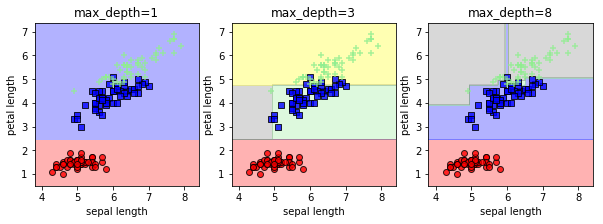

In [21]:
from sklearn.tree import DecisionTreeRegressor

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, max_depth in zip(axes, [1, 3, 8]):
    title = "max_depth=%s"% (max_depth)
    clf = DecisionTreeRegressor(max_depth=max_depth,random_state=1)
    decision_boundary(clf, X, y, ax, title)

In [27]:
DecisionTreeRegressor.__init__

<function sklearn.tree.tree.DecisionTreeRegressor.__init__(self, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)>

In [31]:
# クラス分類

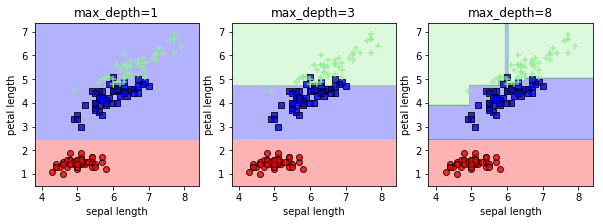

In [29]:
from sklearn.tree import DecisionTreeClassifier

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, max_depth in zip(axes, [1, 3, 8]):
    title = "max_depth=%s"% (max_depth)
    clf = DecisionTreeClassifier(max_depth=max_depth,random_state=1)
    decision_boundary(clf, X, y, ax, title)

In [33]:
DecisionTreeClassifier.__init__

<function sklearn.tree.tree.DecisionTreeClassifier.__init__(self, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)>

# ランダムフォレスト、勾配ブースティング回帰木
ランダムフォレストは異なる決定木をたくさん作ります。全ての決定木で予測した結果からもっとも確率が高くなるラベルを正解とするものです。個々の木だと過剰適合しているかもしれないですが、多くの結果を集約することで過学習を抑制する効果があります。RandomForestClassifier を使います。

勾配ブースティング回帰木(GBDT = Gradient Boosting Decision Tree)もたくさんの決定木を作るのですが、一つ前の決定木の予測値と正解のズレを修正するように次の木を作っていくのだそうです。GradientBoostingClassifier を使います。こちらの方がランダムフォレストよりモデル構築に時間がかかったり、パラメータ設定のチューニングが大変らしいのですが、その分予測性能がよくなるのだそうです。

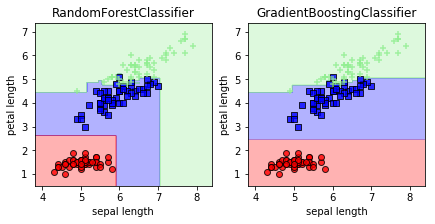

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

fig, axes = plt.subplots(1, 2, figsize=(7, 3))
clfs = [RandomForestClassifier(random_state=1), GradientBoostingClassifier(random_state=1)]
titles = ["RandomForestClassifier", "GradientBoostingClassifier"]

for ax, clf, title in zip(axes, clfs, titles):
    decision_boundary(clf, X, y, ax, title)

# ニューラルネットワーク
scikit-learn にはニューラルネットワークのライブラリも実装されています。  
なお、scikit-learn は GPU に対応していない こともあり、ディープラーニングをやりたい場合は他のライブラリを選定した方がよい

C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

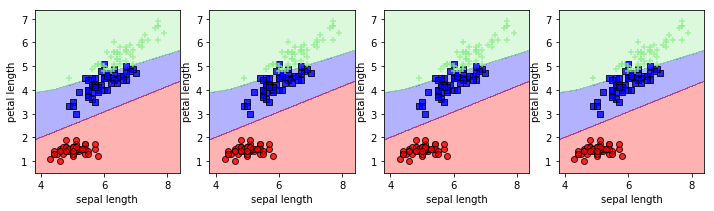

In [24]:
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for ax, n in zip(axes, [15, 15, 15, 15]):
    title = ""
    clf = MLPClassifier(hidden_layer_sizes=[n, n],random_state=1)
    decision_boundary(clf, X, y, ax, title)

# 教師なし学習

# k-means
n_clustersで何個に分類するかを指定します。

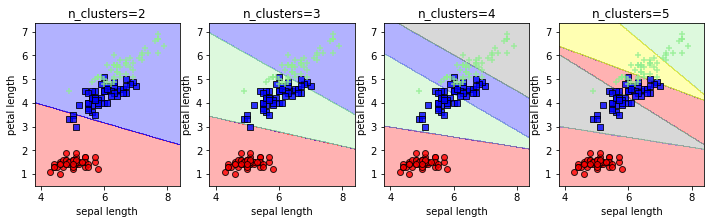

In [25]:
from sklearn.cluster import KMeans

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for ax, n_clusters in zip(axes, [2, 3, 4, 5]):
    title = "n_clusters=%s"% (n_clusters)
    clf = KMeans(n_clusters=n_clusters,random_state=1)
    decision_boundary(clf, X, y, ax, title)

# k-means++

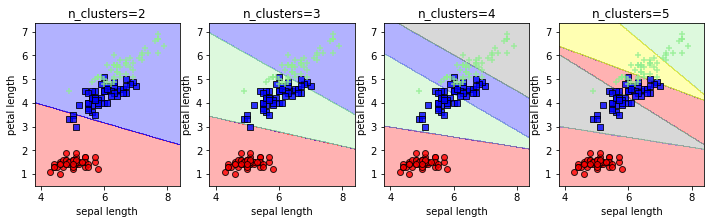

In [26]:
from sklearn.cluster import KMeans

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for ax, n_clusters in zip(axes, [2, 3, 4, 5]):
    title = "n_clusters=%s"% (n_clusters)
    clf = KMeans(n_clusters=n_clusters, init='k-means++',random_state=1)
    decision_boundary(clf, X, y, ax, title)